In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim


In [3]:
data = pd.read_csv("Coursera.csv")
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
data.rename(columns={"University": "Educator"}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   Educator            3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


The dataset contains 3522 entries and 7 columns. We have 7 categorical columns. Based on this, it says that there are no null values, but in the description of the dataset it says that they are defined as "Not Calibrated", so we will find and deal with them.


In [6]:
# Replace "Not Calibrated" with NaN
data.replace("Not Calibrated", np.nan, inplace=True)

# Check for null values in the dataset
data.isnull().sum()

Course Name            0
Educator               0
Difficulty Level      50
Course Rating         82
Course URL             0
Course Description     0
Skills                 0
dtype: int64

In [7]:
# Convert the column to float
data["Course Rating"] = data["Course Rating"].astype(float)

In [8]:
# Fill missing values in the 'Course Rating' column with the mean value of the 'Course Rating' column
data['Course Rating'] = data['Course Rating'].fillna(data['Course Rating'].mean())

Educator
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
Google Cloud                                   88
University of California, Irvine               88
IBM                                            84
University of Colorado System                  83
University of California San Diego             81
Name: count, dtype: int64

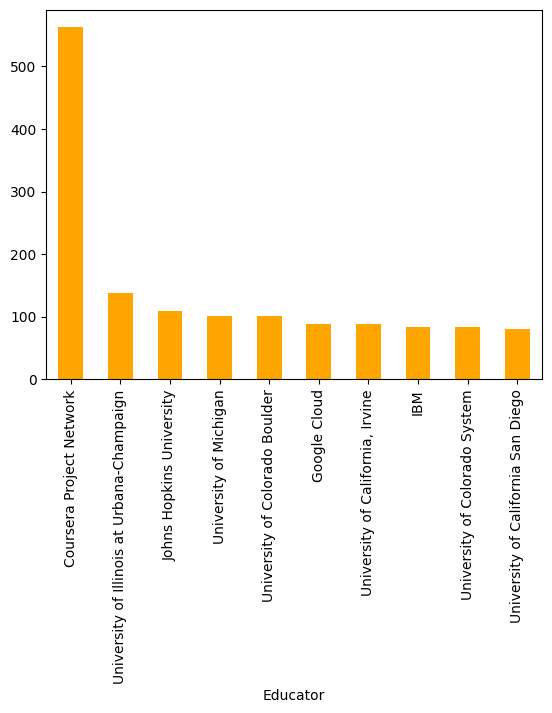

In [9]:
#top ten educators based on number of courses
data["Educator"].value_counts().head(10).plot.bar(color='orange')
data["Educator"].value_counts().head(10)

In [10]:
data["Difficulty Level"].value_counts()

Difficulty Level
Beginner        1444
Advanced        1005
Intermediate     837
Conversant       186
Name: count, dtype: int64

<Axes: xlabel='Course Rating'>

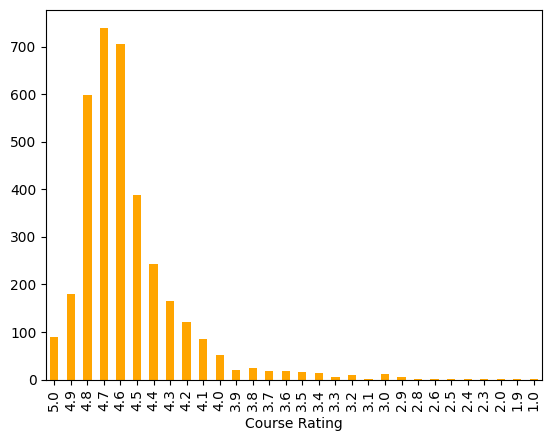

In [11]:
#ratings of courses
data["Course Rating"].round(1).value_counts().sort_index(ascending=False).plot(kind ="bar", color="orange")

In [12]:
data[data['Course Rating'] == 5.0].head()

,Course Name,Educator,Difficulty Level,Course Rating,Course URL,Course Description,Skills
27,AWS Elastic Beanstalk: Build & Deploy a Node.j...,Coursera Project Network,Advanced,5.0,https://www.coursera.org/learn/nodejs-api-aws-...,"In this 1-hour long project-based course, you ...",representational state transfer uniform resou...
33,Advanced Speaking and Listening Project,"University of California, Irvine",Advanced,5.0,https://www.coursera.org/learn/speaking-listen...,Learners will present a well-organized academi...,project rapid serial visual presentation pan...
60,Change Leadership: Developing Force Field Anal...,Coursera Project Network,Advanced,5.0,https://www.coursera.org/learn/change-force-an...,"By the end of this guided project, you will be...",business case personal advertisement Mapping...
69,Create an FPS Weapon in Unity (Part 1 - Revolver),Coursera Project Network,Advanced,5.0,https://www.coursera.org/learn/create-fps-weap...,"In this one-hour, project-based course, you'll...",gamification of learning project process .p...
75,Animals and Institutions,University of Colorado Boulder,Beginner,5.0,https://www.coursera.org/learn/animals-institu...,This course explores animals within the contex...,livestock animal veterinary veterinary medi...


In [13]:
data.loc[27, 'Course Name']

'AWS Elastic Beanstalk: Build & Deploy a Node.js RESTful API'

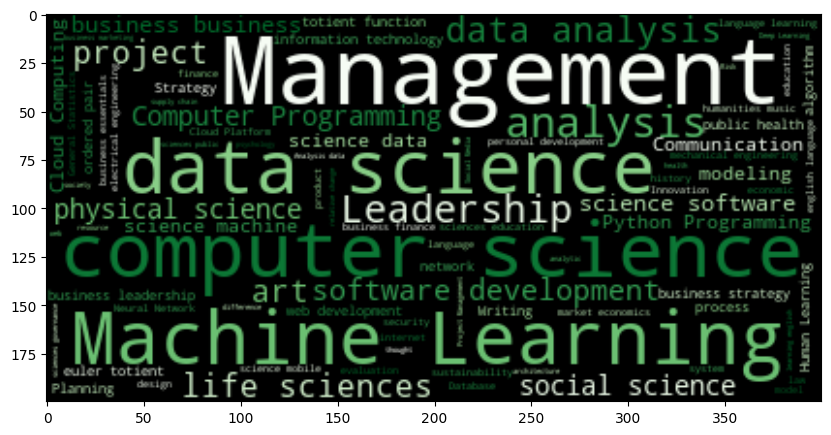

In [14]:
skills = data['Skills'].values

text = ' '.join(skills)

# English Stopwords
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Greens').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()